<a href="https://colab.research.google.com/github/CarlosJozala/Desafio_AnalisedeDados_Hilab/blob/main/TesteManaus_CarlosJozala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#1 Etapa - Transformar o Arquivo JSON em CSV
import csv
import json

def json_to_csv(json_file, csv_file):
    with open(json_file) as f:
        data = json.load(f)
    with open(csv_file, "w") as f:
        writer = csv.writer(f)
        writer.writerow(["year", "sex", "name", "n", "prop"])
        for row in data:
            writer.writerow([row["year"], row["sex"], row["name"], row["n"], row["prop"]])

json_to_csv("parte1.json", "parte1.csv")

In [2]:
#2 Etapa - Transformar o Arquivo SQLLITE para CSV
import sqlite3
import pandas as pd

# Conexão ao banco de dados SQLite
conn = sqlite3.connect("parte3.sqlite")

# Lê os dados do banco de dados em um dataframe do pandas
df = pd.read_sql_query("SELECT year, sex, name, n, prop FROM parte3 WHERE tipo_dado = 1", conn)

# Salva o dataframe como um arquivo CSV
df.to_csv("parte3_filtrado.csv", index=False)

# Encerra conexão com o banco de dados
conn.close()

In [5]:
#3 Etapa - Unificar os CSVs

import pandas as pd

parte1 = pd.read_csv("parte1.csv")
parte2 = pd.read_csv("parte2.csv")
parte3 = pd.read_csv("parte3_filtrado.csv")

# Concatena todos os DataFrames juntos
dataset = pd.concat([parte1, parte2, parte3])

# Salva o dataset unificado como um novo arquivo CSV "dataset_unificado.csv"
dataset.to_csv("dataset_unificado.csv", index=False)

    year  unique_names
0   2000         27512
1   2001         27980
2   2002         28279
3   2003         28886
4   2004         29501
5   2005         30153
6   2006         31624
7   2007         32416
8   2008         32510
9   2009         32242
10  2010         31623
11  2011         31449
12  2012         31279
13  2013         30834
14  2014         30731
15  2015         30583
16  2016         30386
17  2017         29910


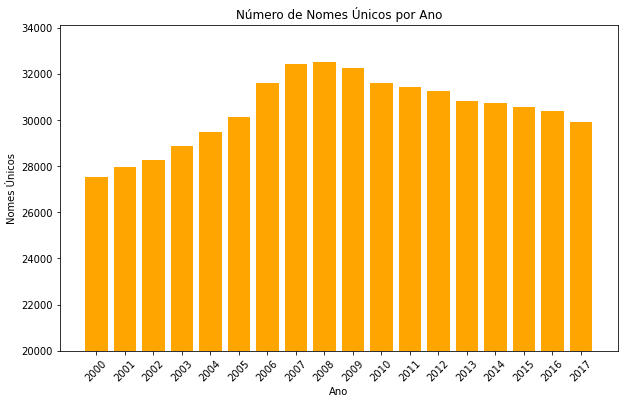

In [21]:
# 1 - Questão: Quantos nomes diferentes existem por ano a partir de 2000? Forneça uma tabela e demonstre os resultados graficamente.

import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo CSV em um dataframe do pandas
df = pd.read_csv("dataset_unificado.csv")

# Seleciona somente os dados a partir de 2000
df = df[df['year'] >= 2000]

# Agrupa os dados por ano e nome e conte o número de ocorrências de cada nome
grouped = df.groupby(['year', 'name']).size().reset_index(name='count')

# Conta o número de nomes únicos por ano
unique_names_by_year = grouped.groupby(['year']).size().reset_index(name='unique_names')

# Exibe a tabela de resultados
print(unique_names_by_year)

# Cria um gráfico de barras mostrando o número de nomes únicos por ano
plt.figure(figsize=(10, 6))
plt.bar(unique_names_by_year['year'], unique_names_by_year['unique_names'], color='orange')
plt.xlabel('Ano')
plt.ylabel('Nomes Únicos')
plt.title('Número de Nomes Únicos por Ano')

# Ajusta o espaçamento do eixo x
plt.xticks(unique_names_by_year['year'], unique_names_by_year['year'], rotation=45)
plt.ylim(bottom=20000)

plt.show()


In [30]:
#Questão 2 - Qual a média e a mediana da contagem de bebês no dataset. Qual dessas medidas de tendência central você escolheria para descrever esse dado, justifique sua opção.

import pandas as pd
import numpy as np

#Lê o arquivo CSV em um dataframe do pandas
df = pd.read_csv("dataset_unificado.csv")

# Agrupa os dados por ano e nome e conte o número de ocorrências de cada nome
grouped = df.groupby(['year', 'name']).size().reset_index(name='count')

# Calcula a média e a mediana da contagem de bebês
mean_count = grouped['count'].mean()
median_count = grouped['count'].median()

print("A média da contagem de bebês é:", mean_count)
print("A mediana da contagem de bebês é:", median_count)


A média da contagem de bebês é: 1.09587344643577
A mediana da contagem de bebês é: 1.0


Escolha a mediana para descrever esse dado, pois ela é menos afetada por valores extremos (outliers) do que a média. Além disso, a mediana é uma medida mais robusta para representar o valor central dos dados, especialmente em conjuntos de dados com distribuição assimétrica.

In [25]:
# Questão 3 - Qual a média e desvio padrão da contagem de bebês no ano de 1997?
import pandas as pd
import numpy as np

# Lê o arquivo CSV em um dataframe do pandas
df = pd.read_csv("dataset_unificado.csv")

# Filtra somente os dados do ano 1997
df_1997 = df[df['year'] == 1997]

# Calcula a média da contagem de bebês no ano de 1997
mean_1997 = df_1997['n'].mean()

# Calcula o desvio padrão da contagem de bebês no ano de 1997
mean = round(df['n'].mean(), 2)
std_dev = round(df['n'].std(), 2)

print("A média da contagem de bebês no ano de 1997 é:", mean)
print("O desvio padrão da contagem de bebês no ano de 1997 é:", std_dev)


A média da contagem de bebês no ano de 1997 é: 180.87
O desvio padrão da contagem de bebês no ano de 1997 é: 1533.34


In [28]:
#Questão 4 - Levando em conta que o dataset engloba o nascimento de todos os bebês do país imaginário Hilablândia. 
#Qual o total de nascimentos no ano de 2002? Desses, quantos são do sexo feminino e quantos do sexo masculino?

import pandas as pd

# Lê o arquivo CSV em um dataframe do pandas
df = pd.read_csv("dataset_unificado.csv")

# Seleciona somente os dados do ano de 2002
df = df[df['year'] == 2002]

# Agrupa os dados por sexo e calcule a contagem total de nascimentos
grouped = df.groupby(['sex']).size().reset_index(name='count')

# Imprime o resultado
print("No ano de 2002, o total de nascimentos foi de ", df['n'].sum(), "bebês.")
print(grouped)


No ano de 2002, o total de nascimentos foi de  3736042 bebês.
  sex  count
0   F  18081
1   M  12482
